In [1]:
from yahooquery import Ticker

In [2]:
divo11 = Ticker('DIVO11.SA')
smal11 = Ticker('SMAL11.SA')
ivvb11 = Ticker('IVVB11.SA')
bova11 = Ticker('BOVA11.SA')

In [3]:
raw_prices_divo11 = divo11.history(start='2010-01-01')
raw_prices_smal11 = smal11.history(start='2010-01-01')
raw_prices_ivvb11 = ivvb11.history(start='2010-01-01')
raw_prices_bova11 = bova11.history(start='2010-01-01')

In [4]:
prices_divo11 = raw_prices_divo11.loc['DIVO11.SA']
prices_smal11 = raw_prices_smal11.loc['SMAL11.SA']
prices_ivvb11 = raw_prices_ivvb11.loc['IVVB11.SA']
prices_bova11 = raw_prices_bova11.loc['BOVA11.SA']

In [5]:
import pandas as pd

In [6]:
closing_prices = pd.DataFrame(index=prices_divo11.index)
closing_prices['divo11'] = prices_divo11['close']
closing_prices['smal11'] = prices_smal11['close']
closing_prices['ivvb11'] = prices_ivvb11['close']
closing_prices['bova11'] = prices_bova11['close']

closing_prices = closing_prices.dropna()

year_2020_on_closing_prices = closing_prices.iloc[1443:]

year_2014_2016_closing_prices = closing_prices.iloc[:500]

In [7]:
year_2020_on_initial_price = year_2020_on_closing_prices.iloc[0]

year_2020_on_normalized = pd.DataFrame(index=year_2020_on_closing_prices.index)

for code in year_2020_on_closing_prices.columns:
    year_2020_on_normalized[code] = year_2020_on_closing_prices[code].apply(lambda x: x / year_2020_on_initial_price[code])
    
    year_2020_on_initial_price = year_2020_on_closing_prices.iloc[0]

year_2014_2016_initial_price = year_2014_2016_closing_prices.iloc[0]    

year_2014_2016_normalized = pd.DataFrame(index=year_2014_2016_closing_prices.index)

for code in year_2014_2016_closing_prices.columns:
    year_2014_2016_normalized[code] = year_2014_2016_closing_prices[code].apply(lambda x: x / year_2014_2016_initial_price[code])

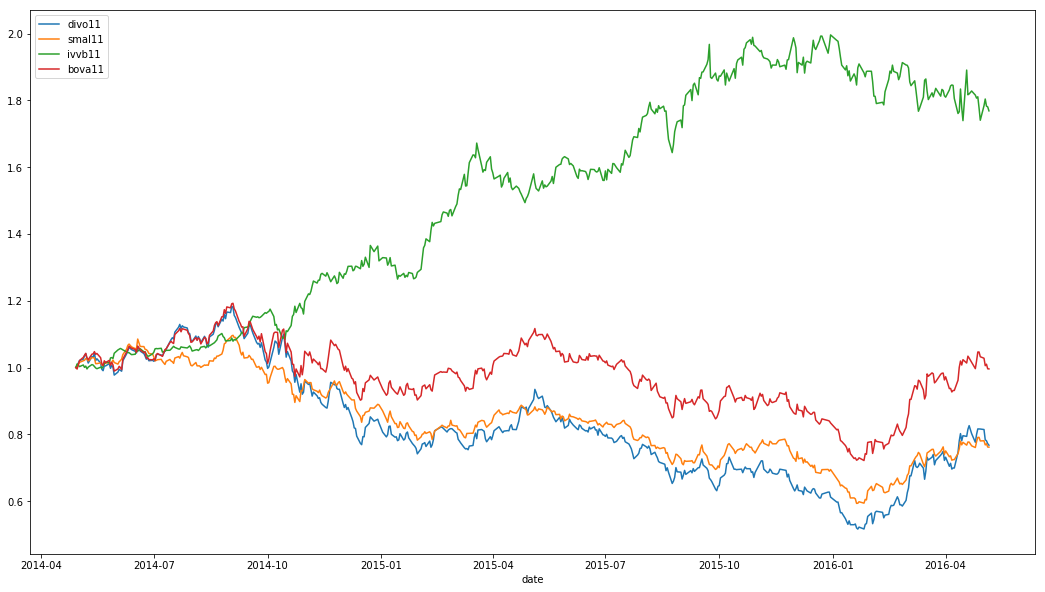

In [9]:
year_2014_2016_normalized.plot(figsize=(18,10))

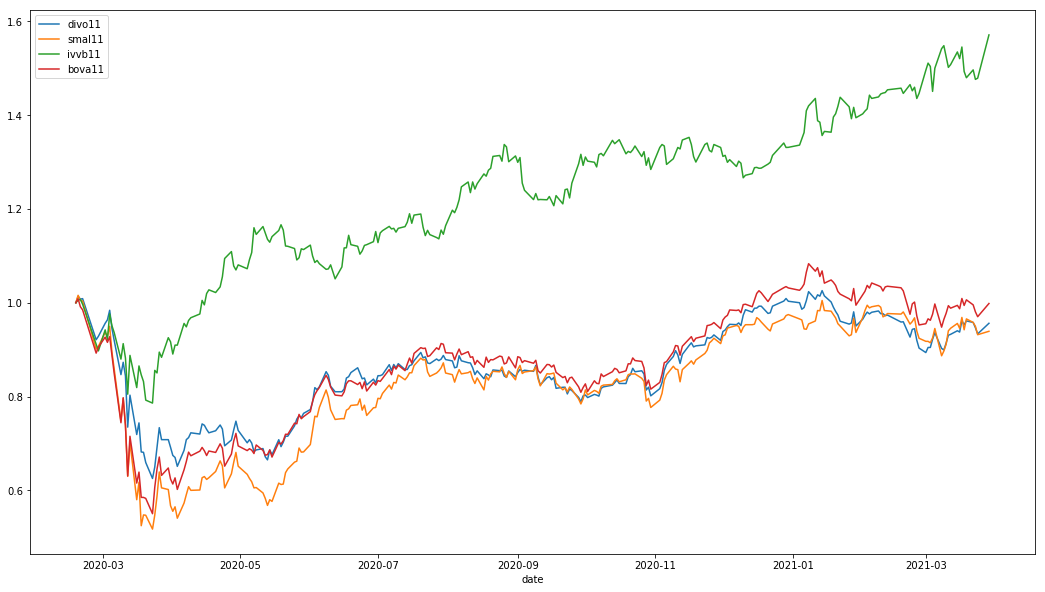

In [10]:
year_2020_on_normalized.plot(figsize=(18,10))

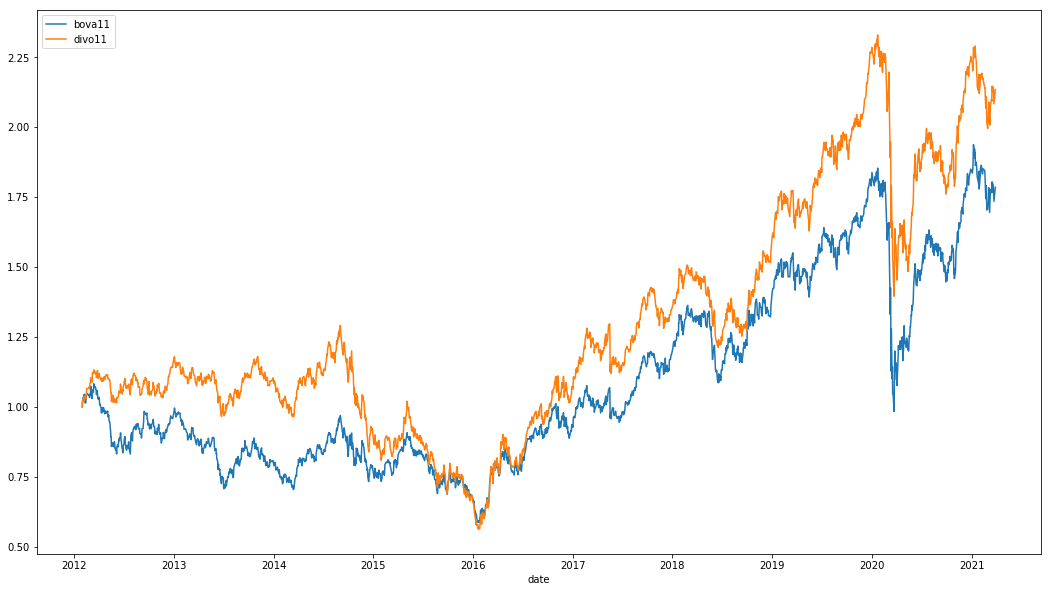

In [11]:
closing_bova11_divo11 = pd.DataFrame(index=prices_bova11.index)

closing_bova11_divo11['bova11'] = prices_bova11['close']
closing_bova11_divo11['divo11'] = prices_divo11['close']

closing_bova11_divo11 = closing_bova11_divo11.dropna()

normalized_bova11_divo11 = pd.DataFrame(index=closing_bova11_divo11.index)

for code in closing_bova11_divo11.columns:
    normalized_bova11_divo11[code] = closing_bova11_divo11[code].apply(
        lambda x: x / closing_bova11_divo11.iloc[0][code])

normalized_bova11_divo11.plot(figsize=(18,10))